In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, glob
from os.path import join
import matplotlib.pyplot as plt

In [185]:
def stat_summary(df, column, value, task):
    subset = df[(df[column] == value) & (df['runtype'] == task)]
    subset_groupby_ses = subset.groupby('ses')
    subset_mean_per_session = subset_groupby_ses[["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]].mean()
    subset_mean = subset_mean_per_session.mean()
    subset_std = subset_mean_per_session.std()
    return subset_mean, subset_std
    



In [186]:
cau.columns

Index(['Unnamed: 0', 'sub', 'ses', 'run', 'runtype', 'onset01_cue',
       'onset02_ratingexpect', 'onset03_stim', 'onset04_ratingoutcome',
       'pmod_cuetype', 'pmod_stimtype', 'pmod_expectRT', 'pmod_expectangle',
       'pmod_outcomeRT', 'pmod_outcomeangle', 'cue_con', 'stim_lin',
       'stim_quad', 'pmod_expectangle_demean', 'pmod_outcomeangle_demean',
       'trial', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14'],
      dtype='object')

In [187]:
def plot_mean_std_line(mean_array, std_array, label):
    # Generate random data for demonstration
    np.random.seed(42)
    x = np.arange(0, len(mean_array), 1)
    time_values = x * 0.46
    # Create the line plot with mean and standard deviation
    sns.lineplot(x=time_values, y=mean_array, marker='o', label=label)
    plt.fill_between(time_values, mean_array - std_array, mean_array + std_array,
                     alpha=0.3)

In [188]:
roi = 'CAU'
main_dir = '/Volumes/spacetop_projects_cue' #'/dartfs-hpc/rc/lab/C/CANlab/labdata/projects/spacetop_projects_cue'
timeseries_dir = join(main_dir, 'analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries')
file_list = sorted(glob.glob(join(timeseries_dir, f'sub-*/sub-*_singletrialextract-{roi}-lh.tsv')))

In [189]:
timeseries_dir

'/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries'

In [190]:
cau
cau[(cau['pmod_cuetype'] == 'low_cue') & (cau['runtype'] == 'pain')]

,Unnamed: 0,sub,ses,run,runtype,onset01_cue,onset02_ratingexpect,onset03_stim,onset04_ratingoutcome,pmod_cuetype,...,5,6,7,8,9,10,11,12,13,14
27,27,sub-0133,ses-01,run-03,pain,96.61243,98.11299,103.74410,117.70363,low_cue,...,4275.405948,4279.861008,4298.570424,4301.303706,4302.080976,4305.063619,4323.716765,4298.216547,4284.348465,4276.450930
30,30,sub-0133,ses-01,run-03,pain,203.30222,205.20293,218.63273,228.71169,low_cue,...,4276.550911,4268.431723,4274.996804,4256.774723,4283.897558,4257.549541,4271.135133,4266.796814,4253.040941,4287.915927
31,31,sub-0133,ses-01,run-03,pain,238.69875,241.91662,254.93839,267.80961,low_cue,...,4283.434068,4309.984873,4275.775910,4310.110826,4318.126872,4301.985864,4289.275649,4281.977682,4276.667301,4282.517684
32,32,sub-0133,ses-01,run-03,pain,276.91300,280.11420,288.53598,305.70707,low_cue,...,4284.733029,4280.230528,4279.622526,4304.169646,4286.424750,4252.000281,4292.073038,4305.689924,4294.904653,4312.679858
33,33,sub-0133,ses-01,run-03,pain,312.30953,315.11058,323.42711,335.60156,low_cue,...,4307.936580,4303.370720,4290.737305,4290.975770,4295.446814,4303.281376,4299.617463,4291.503602,4298.059269,4281.883917
35,35,sub-0133,ses-01,run-03,pain,373.19891,375.71651,383.63992,394.80697,low_cue,...,4296.643936,4270.217998,4309.166870,4304.405818,4294.754197,4316.644524,4291.899171,4289.990559,4281.231219,4282.918988
61,61,sub-0133,ses-01,run-06,pain,32.99080,34.79147,39.91487,53.08163,low_cue,...,4302.646942,4297.195032,4321.878641,4309.779571,4324.217765,4298.878095,4293.483377,4310.276477,4300.384366,4306.615022
62,62,sub-0133,ses-01,run-06,pain,57.98346,60.08424,66.72151,78.29103,low_cue,...,4269.692126,4264.064167,4272.474084,4249.188167,4246.138831,4252.161054,4258.577387,4254.493903,4292.181564,4285.339796
63,63,sub-0133,ses-01,run-06,pain,83.39293,86.49409,99.93072,111.18663,low_cue,...,4305.146247,4296.907491,4272.761582,4269.743146,4271.335830,4281.285631,4282.678599,4301.716888,4287.037233,4280.071084
68,68,sub-0133,ses-01,run-06,pain,244.08619,247.18735,255.80998,269.09552,low_cue,...,4307.803113,4303.693369,4292.396202,4291.610296,4292.233651,4297.574156,4276.385225,4274.602298,4302.700125,4292.944610


In [196]:
cau.columns

Index(['Unnamed: 0', 'sub', 'ses', 'run', 'runtype', 'onset01_cue',
       'onset02_ratingexpect', 'onset03_stim', 'onset04_ratingoutcome',
       'pmod_cuetype', 'pmod_stimtype', 'pmod_expectRT', 'pmod_expectangle',
       'pmod_outcomeRT', 'pmod_outcomeangle', 'cue_con', 'stim_lin',
       'stim_quad', 'pmod_expectangle_demean', 'pmod_outcomeangle_demean',
       'trial', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14'],
      dtype='object')

In [209]:
# List of columns to merge into one column
columns_to_merge = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

# Use pd.melt() to merge the columns into one column
# cau_melted = pd.melt(cau, 
#                      id_vars=['sub', 'ses', 'run', 'pmod_cuetype'], 
#                      value_vars=columns_to_merge,
#                      var_name='timeseries', 
#                      value_name='merged_column')
cau_melted = pd.melt(cau, 
                     id_vars=['sub', 'ses', 'run','runtype','trial', 'pmod_cuetype'], 
                     value_vars=columns_to_merge,
                     var_name='time series', 
                     value_name='beta')

# Drop the 'new_column_name' column if not needed
# cau_melted.drop(columns=['timeseries'], inplace=True)

In [210]:
cau_melted.head()

,sub,ses,run,runtype,trial,pmod_cuetype,time series,beta
0,sub-0133,ses-01,run-01,cognitive,0,low_cue,0,4258.125854
1,sub-0133,ses-01,run-01,cognitive,1,low_cue,0,4232.786067
2,sub-0133,ses-01,run-01,cognitive,2,high_cue,0,4243.642326
3,sub-0133,ses-01,run-01,cognitive,3,low_cue,0,4271.785596
4,sub-0133,ses-01,run-01,cognitive,4,high_cue,0,4262.121334


<Axes: xlabel='time series', ylabel='beta'>

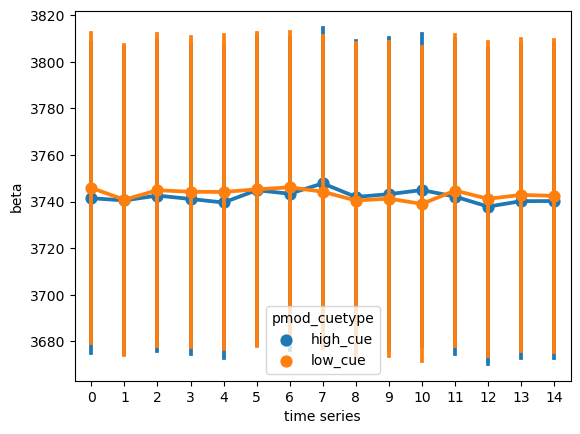

In [216]:
# subset = cau[['sub', 'ses', 'run','pmod_cuetype', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
#        '12', '13', '14']]
sns.pointplot(x="time series", 
              y="beta", 
              hue="pmod_cuetype",
              errorbar="se",
              data=cau_melted[cau_melted['runtype'] == 'pain'],
              join=True)

In [191]:
valid_dataframes = []
invalid_files = []

group_cueH_mean_arr = []
group_cueH_std_arr = []
group_cueL_mean_arr = []
group_cueL_std_arr = []
for fname in file_list:
    try:
        print(fname)
        cau = pd.read_csv(fname, sep='\t')
        if not cau.empty:
            valid_dataframes.append(cau)
        else:
            invalid_files.append(fname)
            

    except pd.errors.EmptyDataError:
        # Handle empty file error
        print(f"Empty file: {fname}")
        invalid_files.append(fname)
    except pd.errors.ParserError:
        # Handle parsing error (e.g., malformed data)
        print(f"Error parsing file: {fname}")
        invalid_files.append(fname)

for cau in valid_dataframes:
    cueH_mean, cueH_std = stat_summary(df=cau, column='pmod_cuetype', value='high_cue', task='pain')
    cueL_mean, cueL_std = stat_summary(df=cau, column='pmod_cuetype', value='low_cue', task='pain')
    group_cueH_mean_arr.append(cueH_mean)
    group_cueH_std_arr.append(cueH_std)
    group_cueL_mean_arr.append(cueL_mean)
    group_cueL_std_arr.append(cueL_std)

/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0002/sub-0002_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0003/sub-0003_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0004/sub-0004_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0005/sub-0005_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0006/sub-0006_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0007/sub-0007_singletrialextract-CAU-lh.tsv
/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv08_parcel/subcortex_Tian2020_timeseries/sub-0008/sub-0008_singletr

In [192]:
np.nanstd(np.vstack(group_cueH_std_arr), axis=0)/(np.sqrt(len(group_cueH_mean_arr)))


array([48.82768626, 48.84566954, 48.93876648, 48.83869902, 48.89972989,
       48.91885722, 48.91455111, 48.91138635, 48.92988211, 48.90856469,
       48.91838274, 48.88660527, 48.92767259, 48.97202099, 48.89486699])

In [193]:
np.nanmean(np.vstack(group_cueH_mean_arr), axis=0)

array([3851.78115651, 3852.2884251 , 3852.29366617, 3852.56501418,
       3852.57187482, 3852.46910369, 3852.83532552, 3852.64929022,
       3852.74102619, 3852.83447226, 3852.82788928, 3852.37448176,
       3852.70686886, 3852.59651202, 3852.61151278])

In [194]:
np.sqrt(len(group_cueH_mean_arr))

10.535653752852738

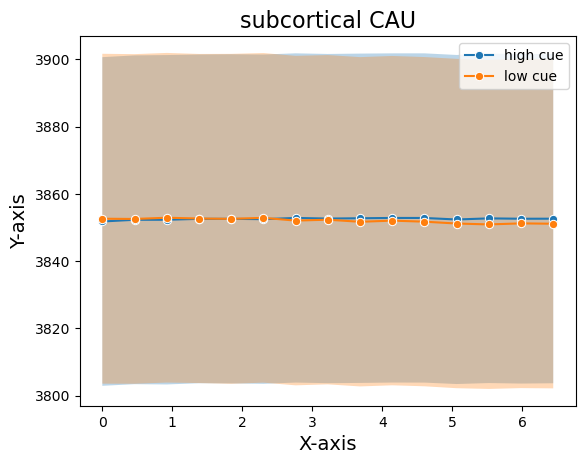

In [195]:
group_cueH_mean = np.nanmean(np.vstack(group_cueH_mean_arr), axis=0)
group_cueH_std = np.nanstd(np.vstack(group_cueH_std_arr), axis=0)/(np.sqrt(len(group_cueH_mean_arr)))
group_cueL_mean = np.nanmean(np.vstack(group_cueL_mean_arr), axis=0)
group_cueL_std = np.nanstd(np.vstack(group_cueL_std_arr), axis=0)/(np.sqrt(len(group_cueH_mean_arr)))
plot_mean_std_line(group_cueH_mean, group_cueH_std, label='high cue')
plot_mean_std_line(group_cueL_mean, group_cueL_std, label='low cue')

# Set labels and title
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.title(f'subcortical {roi}', fontsize=16)
plt.legend()
plt.show()

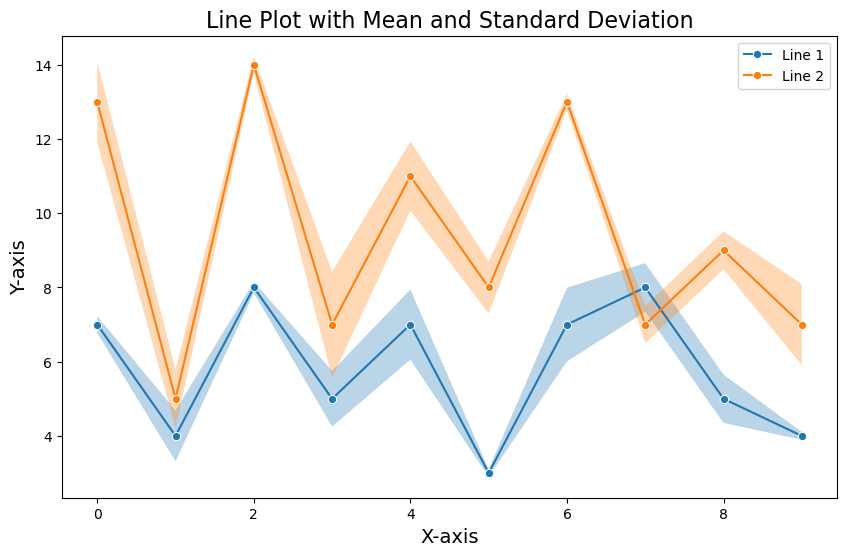

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mean_std_line(mean_array, std_array, label):
    # Generate random data for demonstration
    np.random.seed(42)
    x = np.arange(0, len(mean_array), 1)

    # Create the line plot with mean and standard deviation
    sns.lineplot(x=x, y=mean_array, marker='o', label=label)
    plt.fill_between(x, mean_array - std_array, mean_array + std_array,
                     alpha=0.3)

# Generate random data for two different lines
mean_array_1 = np.random.randint(1, 10, size=10)
std_array_1 = np.random.uniform(0.1, 1.0, size=10)

mean_array_2 = np.random.randint(5, 15, size=10)
std_array_2 = np.random.uniform(0.2, 1.5, size=10)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Call the function twice with different data and labels
plot_mean_std_line(mean_array_1, std_array_1, label='Line 1')
plot_mean_std_line(mean_array_2, std_array_2, label='Line 2')

# Set labels and title
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.title('Line Plot with Mean and Standard Deviation', fontsize=16)

# Show the legend
plt.legend()

# Show the plot
plt.show()


# prototyping

In [2]:
cau = pd.read_csv('/Users/h/Desktop/sub-0133_singletrialextract-CAU-lh.tsv', sep='\t')

In [26]:
cau

,Unnamed: 0,sub,ses,run,runtype,onset01_cue,onset02_ratingexpect,onset03_stim,onset04_ratingoutcome,pmod_cuetype,...,5,6,7,8,9,10,11,12,13,14
0,0,sub-0133,ses-01,run-01,*,14.19382,16.02784,26.71516,37.70259,low_cue,...,4288.390373,4290.519025,4300.722573,4287.382052,4301.617426,4305.344566,4314.515057,4300.001475,4297.621180,4314.759769
1,1,sub-0133,ses-01,run-01,*,43.80486,46.80598,57.49330,69.29771,low_cue,...,4313.665591,4300.098534,4333.404441,4329.247797,4313.979769,4284.662017,4276.558021,4296.816588,4272.264562,4271.228483
2,2,sub-0133,ses-01,run-01,*,77.80088,80.81867,87.60453,97.40819,high_cue,...,4278.247278,4267.462484,4267.716142,4258.828795,4266.115475,4250.898660,4254.119641,4232.500451,4240.443950,4234.667581
3,3,sub-0133,ses-01,run-01,*,110.49640,112.41378,125.90215,136.10595,low_cue,...,4265.126734,4283.294083,4275.776141,4258.791430,4277.306945,4250.726769,4258.136768,4247.912901,4249.730023,4237.283299
4,4,sub-0133,ses-01,run-01,*,150.69473,152.41203,160.89853,173.80334,high_cue,...,4229.304924,4239.460949,4260.379206,4275.273372,4277.821179,4264.136221,4269.186357,4274.994531,4256.396381,4264.301039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,sub-0133,ses-04,run-06,*,234.30705,236.20776,244.91100,255.71503,high_cue,...,3406.654389,3410.904476,3410.285896,3425.398090,3427.136699,3401.436358,3410.015005,3415.699895,3401.835479,3394.297315
212,212,sub-0133,ses-04,run-06,*,266.70246,268.50313,280.80772,289.01078,low_cue,...,3371.795396,3377.401031,3363.001521,3373.153569,3371.945698,3368.685193,3379.527859,3368.536922,3355.693170,3364.787790
213,213,sub-0133,ses-04,run-06,*,294.79627,297.31388,307.90116,317.20463,high_cue,...,3378.560054,3373.445505,3392.930208,3358.391386,3393.830501,3377.992995,3380.763067,3373.813854,3392.234894,3383.306575
214,214,sub-0133,ses-04,run-06,*,327.10832,330.00940,342.89754,361.50448,low_cue,...,3362.121407,3354.464442,3346.693513,3385.353004,3383.423837,3373.857606,3394.473610,3389.499018,3379.399074,3398.383060


In [33]:
# cau['0':'14']
cau.iloc[:, 0:15]
cueL = cau.loc[cau['pmod_cuetype'] == 'low_cue', "0":"14"]
cueH = cau.loc[cau['pmod_cuetype'] == 'high_cue', "0":"14"]

In [10]:
cau.columns

Index(['Unnamed: 0', 'sub', 'ses', 'run', 'runtype', 'onset01_cue',
       'onset02_ratingexpect', 'onset03_stim', 'onset04_ratingoutcome',
       'pmod_cuetype', 'pmod_stimtype', 'pmod_expectRT', 'pmod_expectangle',
       'pmod_outcomeRT', 'pmod_outcomeangle', 'cue_con', 'stim_lin',
       'stim_quad', 'pmod_expectangle_demean', 'pmod_outcomeangle_demean',
       'trial', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14'],
      dtype='object')

In [38]:
grouped_by_ses

In [41]:
average_per_session

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ses,,,,,,,,,,,,,,,
ses-01,4266.387029,4267.769116,4267.312918,4271.920217,4272.904682,4270.174232,4274.703918,4274.244192,4272.240187,4274.902939,4269.488047,4270.074512,4270.157848,4266.764625,4266.295363
ses-03,3570.165826,3566.687994,3569.779446,3570.283820,3567.575964,3569.535955,3570.142164,3570.312676,3570.299483,3570.097805,3566.464137,3572.345098,3568.608836,3570.976030,3571.334126
ses-04,3375.487430,3375.514215,3372.361695,3371.721510,3371.766668,3370.780086,3370.744974,3370.910325,3364.894740,3369.597505,3367.822421,3371.869943,3367.974040,3367.123887,3364.996589


In [42]:
import pandas as pd

# Assuming 'cau' is your original DataFrame

# Step 1: Subset rows with 'pmod_cuetype' == 'low_cue'
cueL_low = cau[cau['pmod_cuetype'] == 'low_cue']

# Step 2: Group by 'ses'
cueL_groupby_ses = cueL_low.groupby('ses')

# Step 3: Calculate the mean of columns "0" to "14" for each session
cueL_average_per_session = cueL_groupby_ses[["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]].mean()

# Step 4: Calculate the overall mean across all sessions
cueL_average = cueL_average_per_session.mean()
cueL_std = cueL_average_per_session.std()
# Print the results
print("Average per session:")
print(cueL_average_per_session)

print("\nOverall average:")
print(cueL_average)


cueH_high = cau[cau['pmod_cuetype'] == 'high_cue']
cueH_groupby_ses = cueH_high.groupby('ses')
cueH_average_per_session = cueH_groupby_ses[["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]].mean()
cueH_average = cueH_average_per_session.mean()
cueH_std = cueH_average_per_session.std()
# Print the results
print("Average per session:")
print(cueH_average_per_session)

print("\nOverall average:")
print(cueH_average)



Average per session:
                  0            1            2            3            4  \
ses                                                                       
ses-01  4266.387029  4267.769116  4267.312918  4271.920217  4272.904682   
ses-03  3570.165826  3566.687994  3569.779446  3570.283820  3567.575964   
ses-04  3375.487430  3375.514215  3372.361695  3371.721510  3371.766668   

                  5            6            7            8            9  \
ses                                                                       
ses-01  4270.174232  4274.703918  4274.244192  4272.240187  4274.902939   
ses-03  3569.535955  3570.142164  3570.312676  3570.299483  3570.097805   
ses-04  3370.780086  3370.744974  3370.910325  3364.894740  3369.597505   

                 10           11           12           13           14  
ses                                                                      
ses-01  4269.488047  4270.074512  4270.157848  4266.764625  4266.295363  
ses-0

In [45]:
cueH_mean, cueH_std = stat_summary(df=cau, column='pmod_cuetype', value='high_cue')

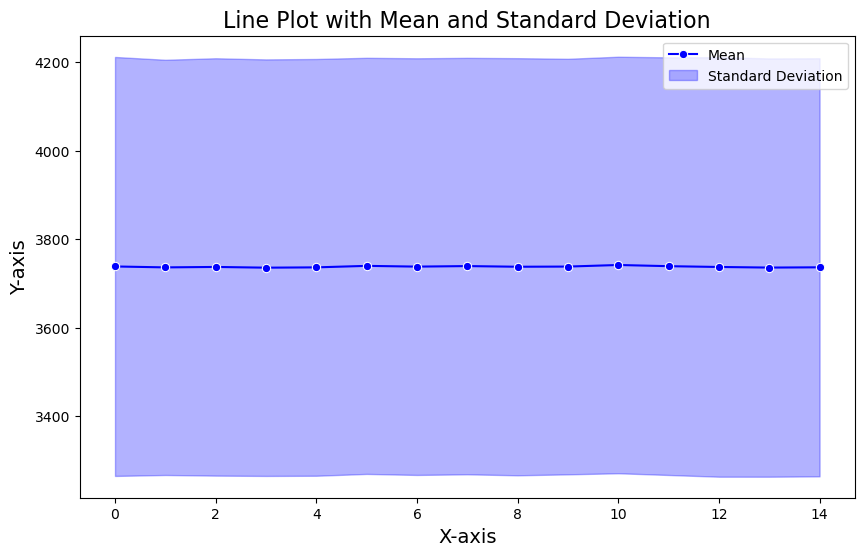

In [43]:
# average_df = pd.DataFrame(data)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data for demonstration
np.random.seed(42)
x = np.arange(0, len(cueH_std), 1)
# mean_values = np.random.randint(1, 10, size=10)
# standard_deviation = np.random.uniform(0.1, 1.0, size=10)

# Create the line plot with mean and standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=cueH_average, marker='o', color='blue', label='Mean')
plt.fill_between(x, cueH_average - cueH_std, cueH_average + cueH_std,
                 color='blue', alpha=0.3, label='Standard Deviation')

# Set labels and title
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.title('Line Plot with Mean and Standard Deviation', fontsize=16)

# Show the legend
plt.legend()

# Show the plot
plt.show()
